# Customers Segmentation of Online Retail store

#Table of Contents
1. Problem Statement
2. Project Objective
3. Data Description
4. Data Pre-processing
5. Choosing the Algorithm for the Project
6. Conclusion
7. References

# 1. Problem Statement
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

# 2. Project Objective
1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.

# 3.  Data Description
1. InvoiceNo: Invoice number.  a 6-digit integral number assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product code.  a 5-digit integral number uniquely assigned to each product.
3. Description: Product  name.
4. Quantity: The quantities of each product  per transaction.
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice:  Numeric, Product price per unit.
7. CustomerID: Customer number. a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name.  the name of the country where each customer resides.

# 4. Data Preprocessing Steps And Inspiration

The data had unicode characters so set encoding to 'ISO-8859-1' while loading the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datetime as dt
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('OnlineRetail.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df= df.dropna()
df.shape

(406829, 8)

In [9]:
# After removing null values rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# For comparison of sales it is required to find out total sales value of each transaction as below.

In [10]:
# Calaculating Sales values for each transaction.
df['Sales_value']=df['Quantity']*df['UnitPrice']

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# Ploting of region wise sales

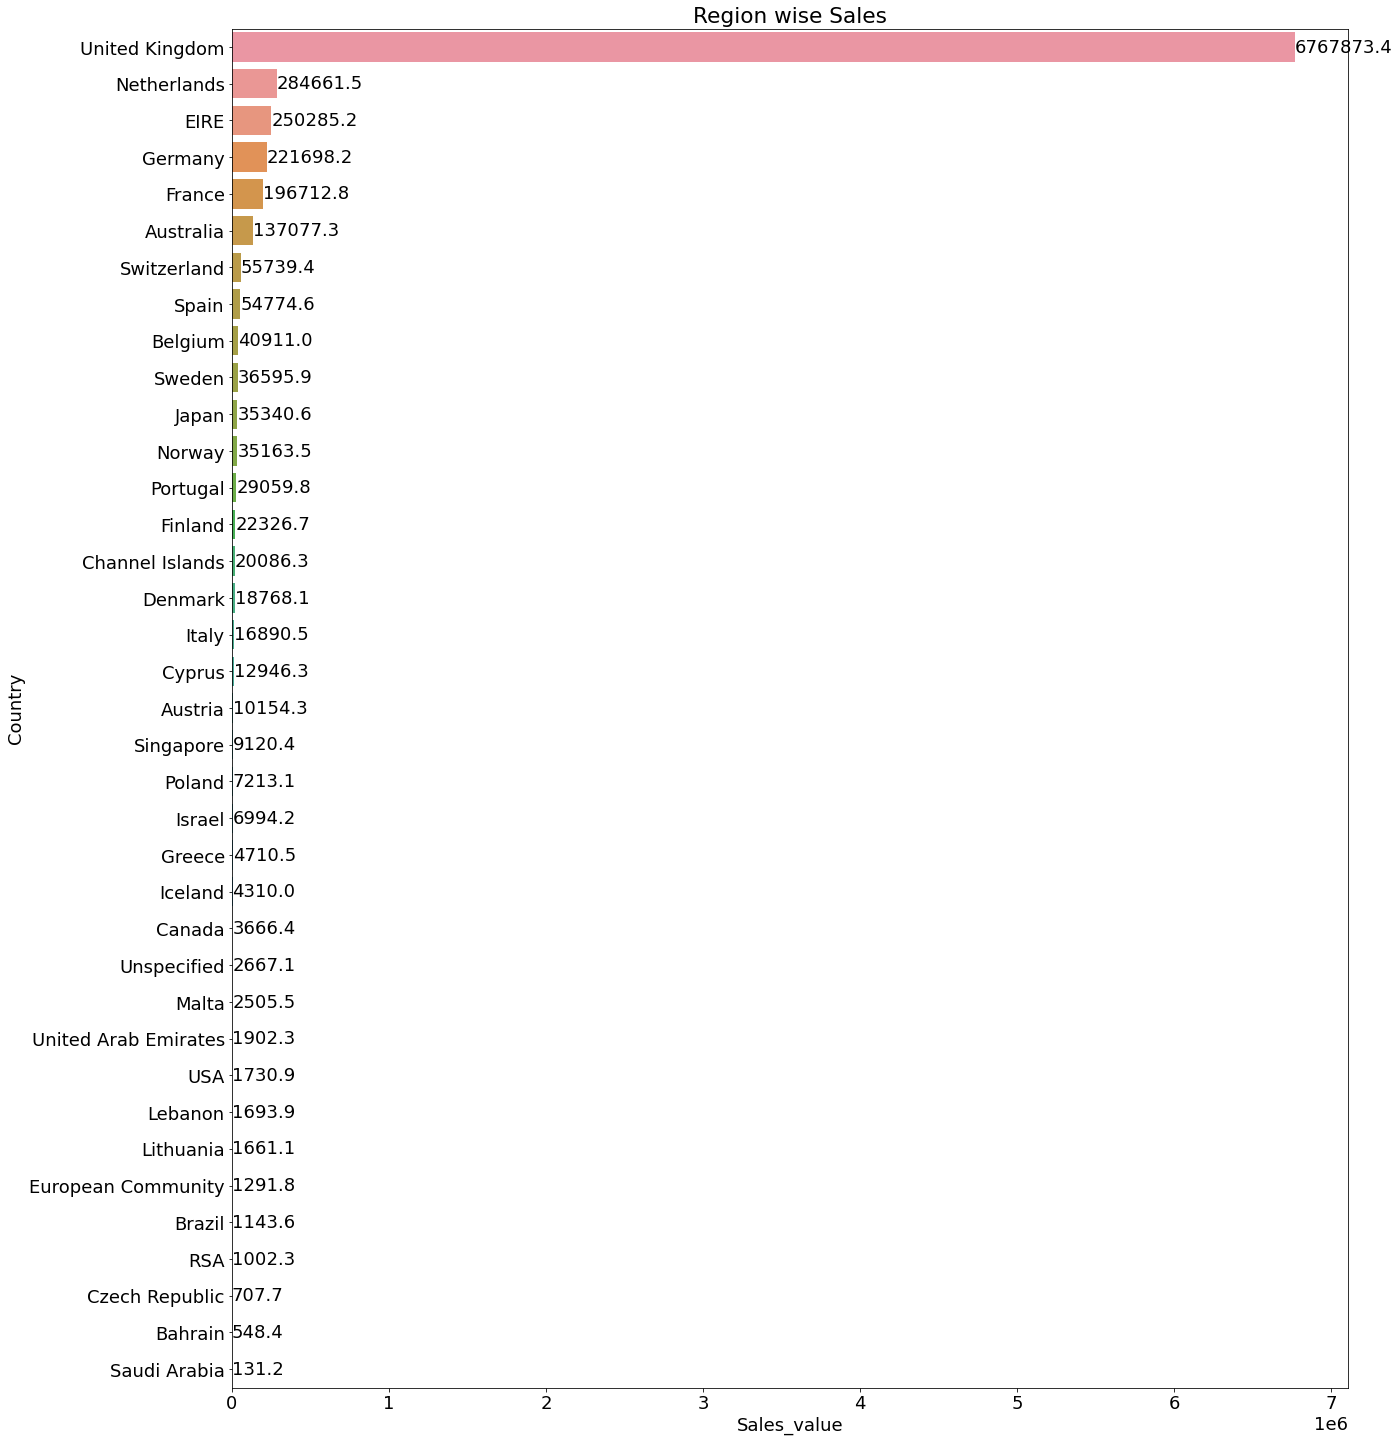

In [12]:
# Region wise sales
d1=df.groupby(['Country']).sum().reset_index()
plt.figure(figsize=(20,25))
plt.rcParams['font.size']=18
ax=sns.barplot(x='Sales_value',y='Country', data=d1, order=d1.sort_values(by='Sales_value',ascending=False)['Country'])

for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
    
plt.title('Region wise Sales')
plt.show()


# Ploting 10 products having maximum sales.

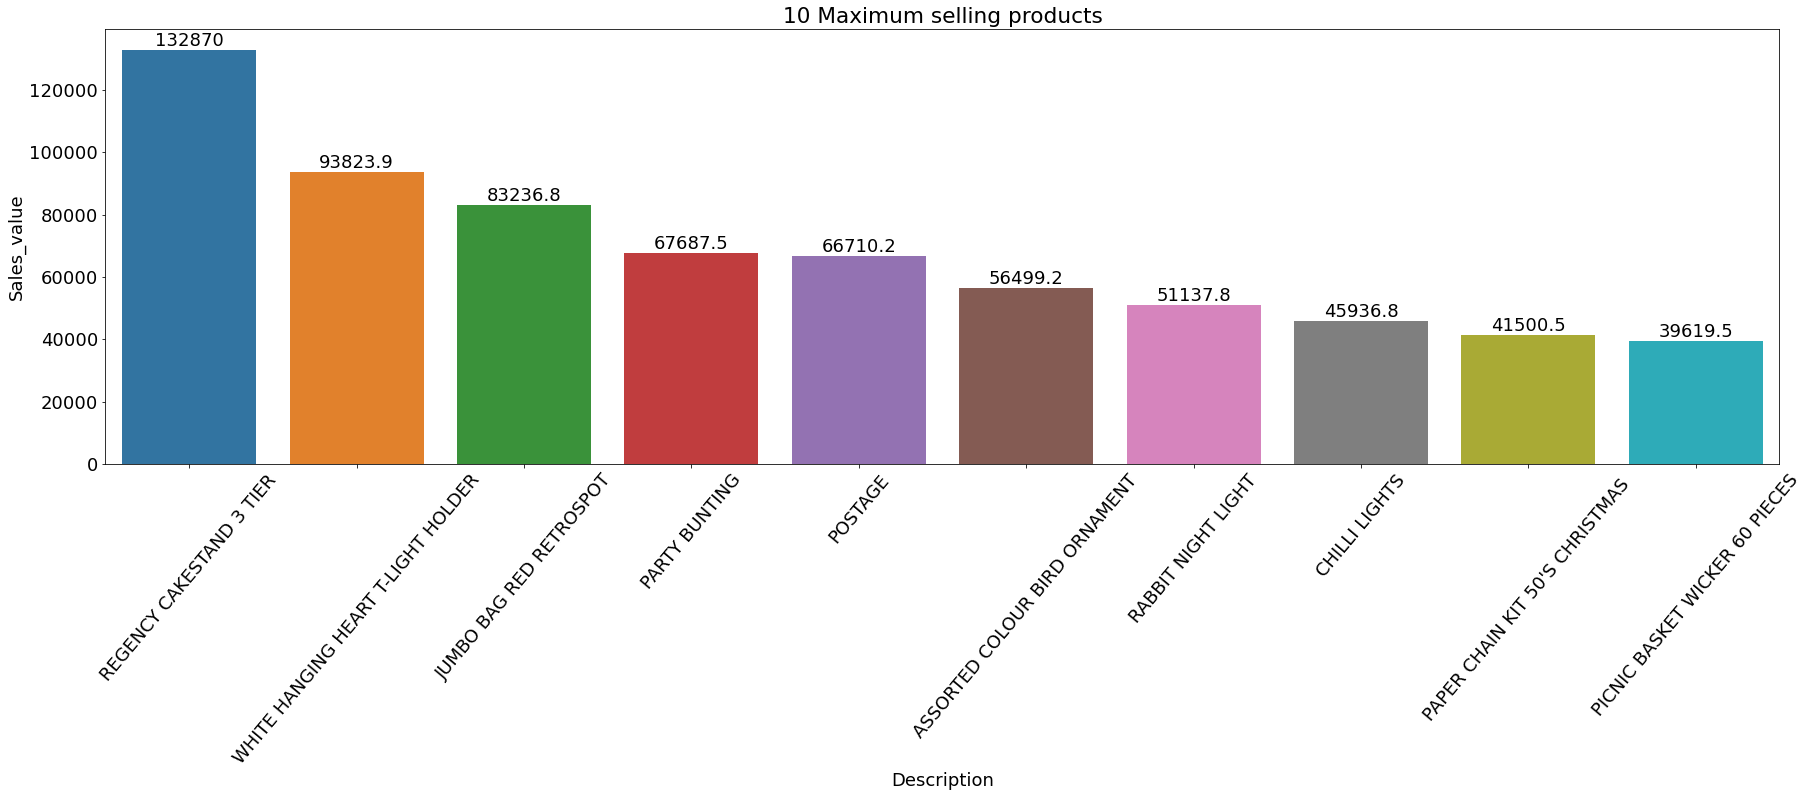

In [13]:
# 10 Maximum selling products
df2=pd.DataFrame(df.groupby(['Description'])['Sales_value'].sum())
sorted_df=(df2[df2['Sales_value']>0]).sort_values('Sales_value', ascending=False)
sorted_df=sorted_df.drop('DOTCOM POSTAGE')

df3=sorted_df.nlargest(10,['Sales_value'])

plt.figure(figsize=(30,8))
plt.rcParams['font.size']=18
ax1=sns.barplot(x=df3.index,y='Sales_value', data=df3)
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation = 50)
plt.title('10 Maximum selling products')
plt.show()

# Ploting 10 products having least sales.

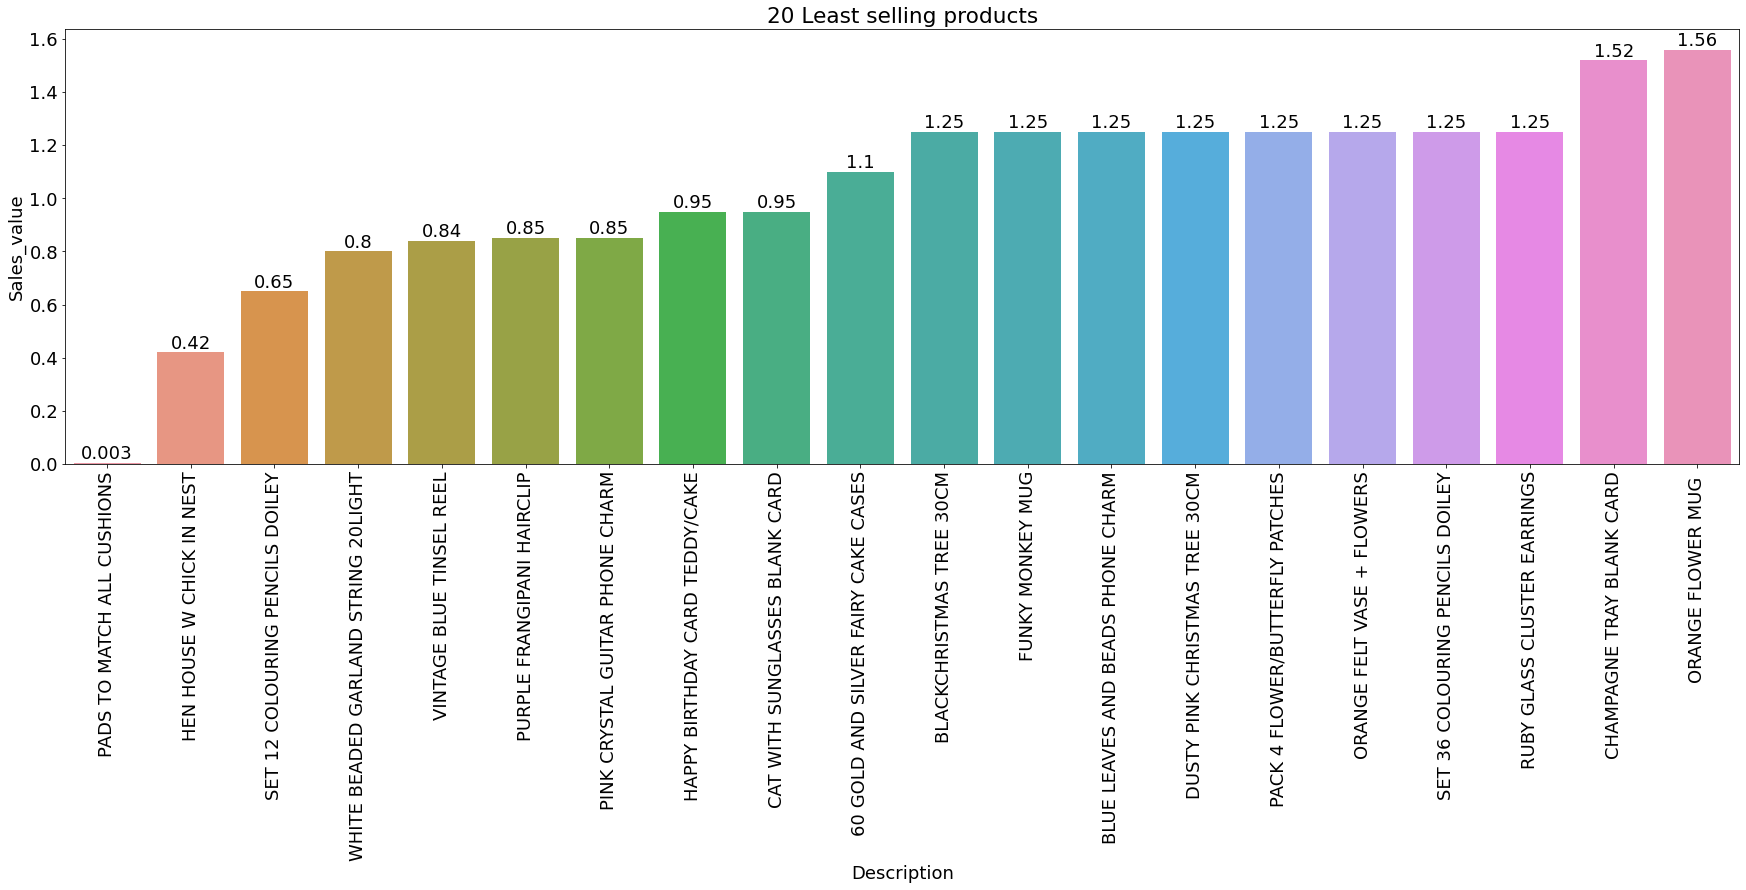

In [14]:
# 20 Low selling products
df4=pd.DataFrame(df.groupby(['Description'])['Sales_value'].sum())
sorted_df1=(df4[df4['Sales_value']>0]).sort_values('Sales_value', ascending=True)
df5=sorted_df.nsmallest(20,['Sales_value'])
plt.figure(figsize=(30,8))
plt.rcParams['font.size']=18
ax2=sns.barplot(x=df5.index,y='Sales_value', data=df5)
ax2.bar_label(ax2.containers[0])
plt.xticks(rotation = 90)
plt.title('20 Least selling products')
plt.show()

# Ploting products having maximum order cancellations.

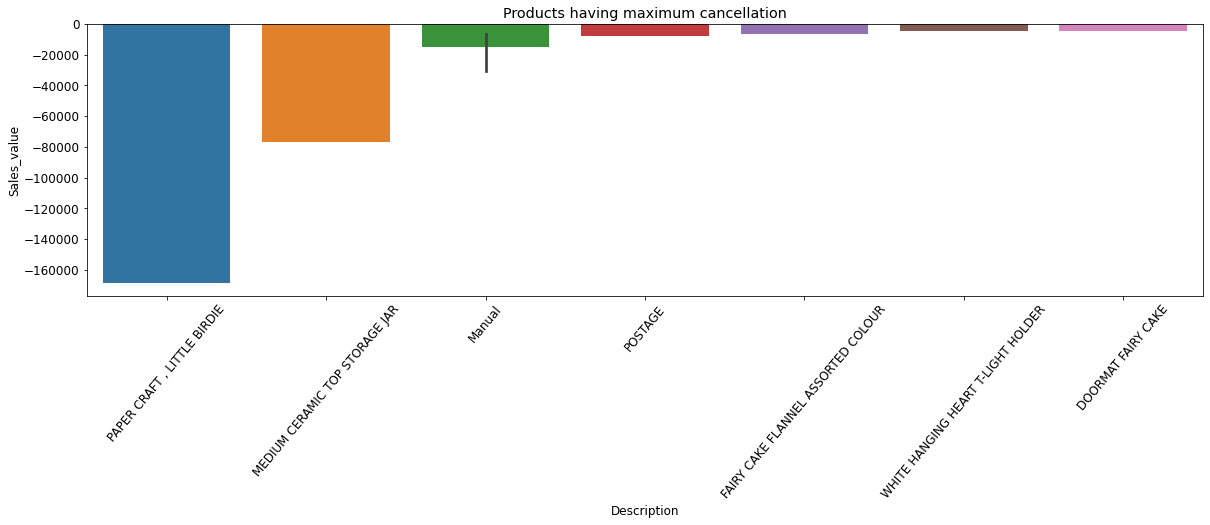

In [15]:
# 10 products having maximum cancellation
df6=pd.DataFrame(df.groupby(['Description','InvoiceNo'])['Sales_value'].sum())
sorted_df2=(df6[df6['Sales_value']<0]).sort_values('Sales_value', ascending=True)
sorted_df2.reset_index()
df7=sorted_df2.nsmallest(10,['Sales_value'])
df7.reset_index()
df7.index = df7.index.droplevel(1)
plt.figure(figsize=(20,5))
plt.rcParams['font.size']=12
sns.barplot(x=df7.index,y='Sales_value',data=df7)
plt.xticks( rotation = 50)
plt.title('Products having maximum cancellation')
plt.show()

In [16]:
df['Sales_value'].describe()

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Sales_value, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Sales_value  406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


# RFM Segmentation
RFM stands for Recency, Frequency, and Monetary. RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

In [18]:
# removing negative Quantities for RFM segmentation
df2=df[(df['Quantity']>0)]

In [19]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [20]:
df2.shape

(397924, 9)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
 8   Sales_value  397924 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [22]:
df2['CustomerID'] = df2['CustomerID'].astype(str)

In [23]:
df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'])

In [24]:
max_date = max(df2['InvoiceDate']) + dt.timedelta(days=1)
max_date

Timestamp('2011-12-10 12:50:00')

In [25]:
df2['Diff'] = max_date - df2['InvoiceDate']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_value,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [26]:
# Aggregate data on a customer level
data_rfm = df2.groupby(['CustomerID'],as_index=False).agg({
'InvoiceDate': lambda x: (max_date - x.max()).days,
'InvoiceNo': 'count',
'Sales_value': 'sum'}).rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalSum': 'MonetaryValue'})
data_rfm

,CustomerID,Recency,Frequency,Sales_value
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,756,2094.88


Text(0.5, 0, 'Attributes')

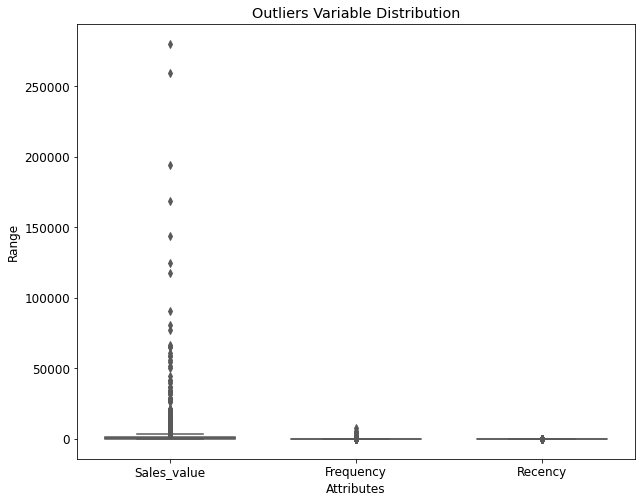

In [27]:
columns = ['Sales_value','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data_rfm[columns], orient="v", palette="Set2", width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("Attributes")

In [28]:
Q1 = data_rfm.Sales_value.quantile(0.05)
Q3 = data_rfm.Sales_value.quantile(0.95)
IQR = Q3 - Q1
data_rfm = data_rfm[(data_rfm.Sales_value >= Q1 - 1.5*IQR) & (data_rfm.Sales_value <= Q3 + 1.5*IQR)]


Q1 = data_rfm.Recency.quantile(0.05)
Q3 = data_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
data_rfm = data_rfm[(data_rfm.Recency >= Q1 - 1.5*IQR) & (data_rfm.Recency <= Q3 + 1.5*IQR)]


Q1 = data_rfm.Frequency.quantile(0.05)
Q3 = data_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
data_rfm = data_rfm[(data_rfm.Frequency >= Q1 - 1.5*IQR) & (data_rfm.Frequency <= Q3 + 1.5*IQR)]

In [29]:
from sklearn.preprocessing import StandardScaler
rfm_data = data_rfm[['Sales_value', 'Frequency', 'Recency']]
sc = StandardScaler()
rfm_data_scaled = sc.fit_transform(rfm_data)
rfm_data_scaled.shape

(4257, 3)

In [30]:
rfm_df_scaled = pd.DataFrame(rfm_data_scaled)
rfm_df_scaled.columns = ['Sales_value', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Sales_value,Frequency,Recency
0,1.645726,1.067832,-0.917872
1,0.262124,-0.460601,-0.189272
2,0.240269,-0.035474,-0.748198
3,-0.543361,-0.602310,2.156221
4,0.652411,0.085991,-0.578524


# 5. Choosing the Algorithm For the Project
K-means clustering will help in segregation of customers based upon their buying patterns.

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,init='k-means++', max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=42)

In [32]:
kmeans.inertia_

3373.871610172334

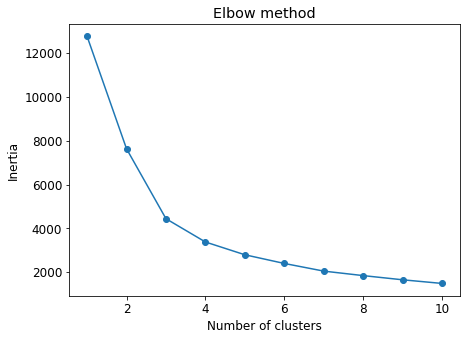

In [33]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(rfm_df_scaled)
    inertia.append(kmeans.inertia_)
data_inertia=pd.DataFrame({'cluster':range(1,11),'inertia':inertia})
plt.figure(figsize=(7,5))
plt.plot(data_inertia['cluster'],data_inertia['inertia'], marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Here 4 clusters are considered optimum for futher analysis

In [34]:
kmeans = KMeans(n_clusters=4,init='k-means++', max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=42)

In [35]:
kmeans.inertia_

3373.871610172334

In [36]:
kmeans.labels_

array([0, 2, 2, ..., 1, 2, 2])

In [38]:
data_rfm['Cluster_Id'] = kmeans.labels_
data_rfm.head()

,CustomerID,Recency,Frequency,Sales_value,Cluster_Id
1,12347.0,2,182,4310.00,0
2,12348.0,75,31,1797.24,2
3,12349.0,19,73,1757.55,2
4,12350.0,310,17,334.40,1
5,12352.0,36,85,2506.04,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='count'>

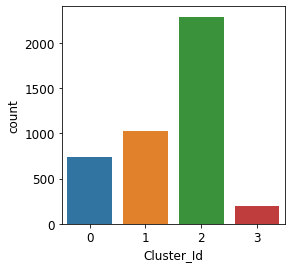

In [46]:
plt.figure(figsize=(4,4))
sns.countplot(x='Cluster_Id', data=data_rfm)

# Plotting clusters against Sales_value, Frequency and Recency

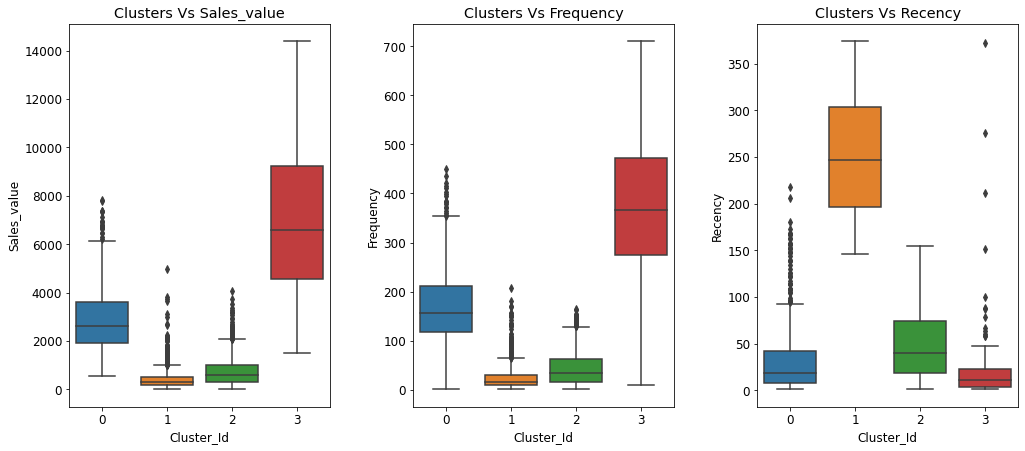

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
fig.tight_layout(pad=4.0)
plt.subplot(1,3,1)
sns.boxplot(x='Cluster_Id', y='Sales_value', data=data_rfm)
plt.title('Clusters Vs Sales_value')

plt.subplot(1,3,2)
sns.boxplot(x='Cluster_Id', y='Frequency', data=data_rfm)
plt.title('Clusters Vs Frequency')

plt.subplot(1,3,3)
sns.boxplot(x='Cluster_Id', y='Recency', data=data_rfm)
plt.title('Clusters Vs Recency')

plt.show()

Calculating mean of Recency, Frequency and Frequency from data_rfm so as to gain insight and clasifiy the clusters for proper understanding.

In [40]:
rating=data_rfm.groupby('Cluster_Id').mean()
rating

,Recency,Frequency,Sales_value
Cluster_Id,,,
0,31.593540,170.582773,2821.977525
1,251.928641,25.611926,428.884731
2,50.104367,42.749782,729.275600
3,20.233831,372.333333,7058.789801


Rearranging the clusters in order of Sales Value, Frequency of purchases, most Recent purchases i.e. Recency.

In [41]:
column_name = ['Sales_value', 'Recency', 'Frequency']
best_pair = rating.nlargest(4, column_name)
best_pair

,Recency,Frequency,Sales_value
Cluster_Id,,,
3,20.233831,372.333333,7058.789801
0,31.593540,170.582773,2821.977525
2,50.104367,42.749782,729.275600
1,251.928641,25.611926,428.884731


The customers can be classified as below based upon RFM interpretation.

1. New customers    : Customers who transacted recently and have lower purchase frequency, with low amount of monetary spending.

2. Lost customers   : Customers with the least monetary spending and the least number of transactions. Made their last purchase long ago.

3. Best customers   : Most frequent spenders with highest monetary spending amount and had transacted recently.

4. At Risk customers: Customers who made their last transaction a while ago and made less frequent and low monetary purchases.           

Thus from the above rearranged values it can be inferred as below.

Cluster_id 3 are the Best customers

Cluster_id 0 are the New customers

Cluster_id 1 are the At Risk customers

Cluster_id 2 are the Lost customers

# 6. Conclusion

The 4 clusters thus created are as below
1. New customers
2. Lost Customers
3. Best Customers
4. At risk customers

Thus for the bussiness it is necessary to analyse the customers based on above mentioned segmentation and devise marketing strategy for each segments so as to improve the customer base and sales.

#References

https://towardsdatascience.com/customer-segmentation-in-online-retail-1fc707a6f9e6